In [33]:
#pip install seaborn

In [34]:
#pip install urllib3

In [35]:
#pip install requests

In [36]:
#pip install yfinance

In [37]:
#pip install pystan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3
import json
import requests
from pandas.io.json import json_normalize
from datetime import datetime
import yfinance as yf

#Install Dependencies
import tensorflow as tf
from tensorflow import keras
import torch
import re

# import nltk
# from nltk.corpus import stopwords
# from nltk import tokenize
from keras.preprocessing.text import Tokenizer


from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

#statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold,StratifiedKFold
#Model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math



In [39]:
from  prophet import Prophet

In [40]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_11-12.2022.csv")


In [41]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_dec_jan.csv")

                                                                                    Collect data from yfinance 

In [42]:
sp500=yf.Ticker("^GSPC")

In [43]:
GTHX=yf.Ticker("GTHX")

In [44]:
sp500.get_news()

[{'uuid': 'e6454cc5-85ae-36dc-b833-fad5aa87e48e',
  'title': 'S&P 500 Wipes Out Almost 1% Rally on Fed Overhang: Markets Wrap',
  'publisher': 'Bloomberg',
  'link': 'https://finance.yahoo.com/news/asia-stocks-face-pressure-fed-224556015.html',
  'providerPublishTime': 1677172222,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/spLAXTV8_0FRz4iewhD1fg--~B/aD0xMDgwO3c9MTkyMDthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/bloomberg_markets_842/f0a521e36f10c731c3e7b4d82b1424a6',
     'width': 1920,
     'height': 1080,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/.SCbyq6TKEhaFtCKbv6Y3Q--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/bloomberg_markets_842/f0a521e36f10c731c3e7b4d82b1424a6',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['^GSPC']},
 {'uuid': '08e76352-fc53-303f-82f9-ee93713d8c30',
  'title': 'Lucid stock falls 18%, on pace f

In [45]:
index_price=sp500.history(start="2022-11-01", end="2023-01-12",)

In [46]:
index_price_13m=sp500.history(start="2022-01-01", end="2023-01-31",)
index_price_13m.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)
index_price_13m=index_price_13m.tz_localize(None)

In [47]:
index_price.drop(labels=["Dividends","Stock Splits"],axis=1,inplace=True)

In [48]:
index_price=index_price.tz_localize(None)

In [49]:
index_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    49 non-null     float64
 1   High    49 non-null     float64
 2   Low     49 non-null     float64
 3   Close   49 non-null     float64
 4   Volume  49 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


                                                                                    DATA WRANGLING & CLEANING 

In [50]:
#index=pd.read_csv

In [51]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   title         10000 non-null  object
 2   url           10000 non-null  object
 3   description   10000 non-null  object
 4   source        10000 non-null  object
 5   tickers       10000 non-null  object
 6   tags          10000 non-null  object
 7   published_at  10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


In [52]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [53]:
news_2.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [54]:
news.isna().sum()

title           0
url             0
description     0
source          0
tickers         0
tags            0
published_at    0
dtype: int64

<AxesSubplot:xlabel='source', ylabel='count'>

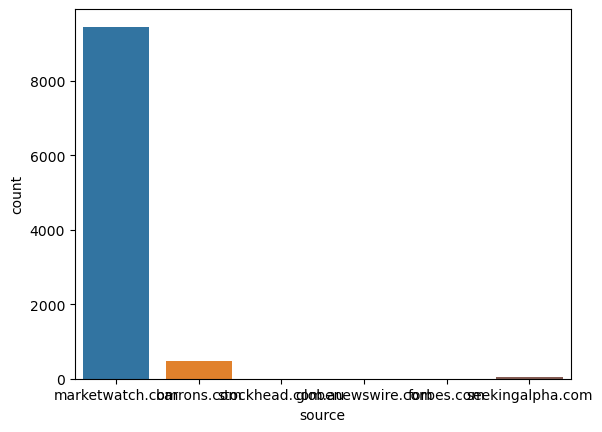

In [55]:
sns.countplot(data=news,x="source")

                                                                            FinBERT test

Test

In [56]:
tokens=tokenizer.encode("wells fargo maintains overweight on agilent technologies raises price target to 95.",return_tensors="pt")
tokens

tensor([[  101,  7051, 23054,  9319,  2058, 11179,  2006, 29003,  3372,  6786,
         13275,  3976,  4539,  2000,  5345,  1012,   102]])

In [57]:
result=model(tokens)
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [58]:
result.logits

tensor([[ 1.7195, -1.9257, -0.9715]], grad_fn=<AddmmBackward0>)

In [59]:

(torch.argmax(result.logits))+1


tensor(1)

                                                Apllying Model on tittles

In [60]:
def sentiment_score(text):
    tokens=tokenizer.encode(text,return_tensors="pt")
    result=model(tokens)
    return int(torch.argmax(result.logits))+1




In [61]:

#news["sentiment_title"]=news["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [62]:

#news_2["sentiment_title"]=news_2["title"].apply(lambda x:sentiment_score(x[:512]))
#BERT (and many other transformer models) will consume 512 tokens max — truncating anything beyond this length

In [63]:
#news_2["sentiment_description"]=news_2["description"].apply(lambda x:sentiment_score(x[:512]))

In [64]:
#news_2.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [65]:
news=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [66]:
news_2=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full_2.csv")

In [67]:
news=news.append(news_2)

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_86424/2509051536.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(news_2)


In [68]:
news["date"]=pd.to_datetime(news["published_at"]).dt.date


In [69]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             20000 non-null  int64  
 1   title                  20000 non-null  object 
 2   url                    20000 non-null  object 
 3   description            20000 non-null  object 
 4   source                 20000 non-null  object 
 5   tickers                20000 non-null  object 
 6   tags                   20000 non-null  object 
 7   published_at           20000 non-null  object 
 8   sentiment_title        20000 non-null  int64  
 9   sentiment_description  10000 non-null  float64
 10  date                   20000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [70]:
news.drop(labels="Unnamed: 0",axis=1,inplace=True)

In [71]:
news.reset_index(inplace=True)

In [72]:
news.drop(labels="index",axis=1,inplace=True)

<AxesSubplot:xlabel='sentiment_description', ylabel='count'>

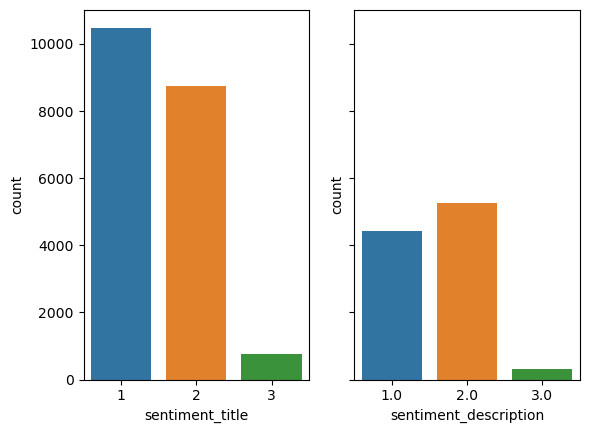

In [73]:
n_subplots=2
sharey=True
fig,axs=plt.subplots(1,n_subplots,sharey=sharey)
sns.countplot(data=news,x="sentiment_title",ax=axs[0])
sns.countplot(data=news,x="sentiment_description",ax=axs[1])



In [74]:
#news.to_csv("/Users/Yanaorfin_1/Documents/Academy/Stock_market_sentiment_analysis/Data_set/news_full.csv")

In [75]:
grouped_news=news.loc[:,["date","sentiment_title","sentiment_description"]].groupby(by="date",axis=0,dropna=True,as_index=True).mean()

In [76]:
grouped_news.head()

,sentiment_title,sentiment_description
date,,
2022-11-01,1.800000,1.646154
2022-11-02,1.911765,1.926471
2022-11-03,1.916667,1.816667
2022-11-04,1.843137,1.607843
2022-11-05,2.000000,2.000000


<AxesSubplot:xlabel='date'>

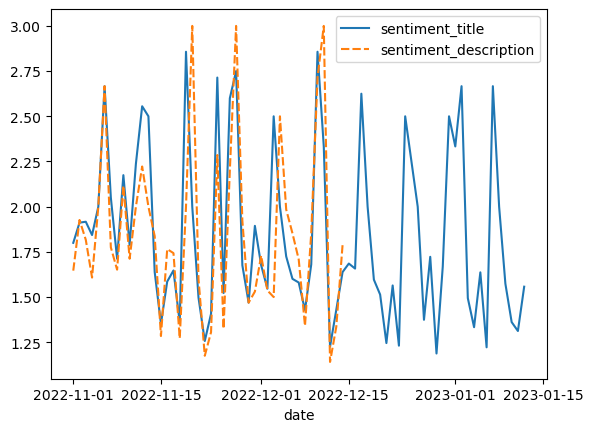

In [77]:
sns.lineplot(data=grouped_news)

In [78]:
index_price.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,4303360000


In [79]:
full_data=index_price.join(grouped_news, how="left")

In [80]:
full_data.drop(labels="sentiment_description",axis=1,inplace=True)

In [81]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 2022-11-01 to 2023-01-11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             49 non-null     float64
 1   High             49 non-null     float64
 2   Low              49 non-null     float64
 3   Close            49 non-null     float64
 4   Volume           49 non-null     int64  
 5   sentiment_title  49 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.7 KB


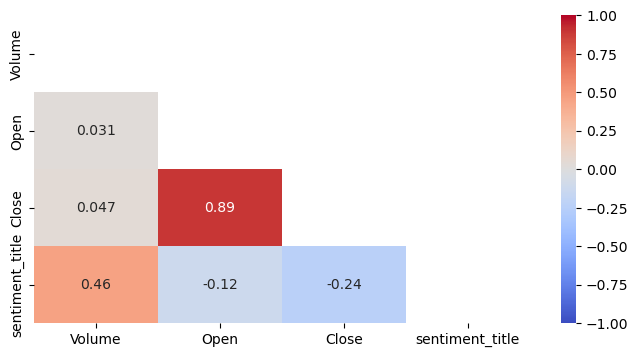

In [82]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=full_data[["Volume","Open","Close","sentiment_title"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

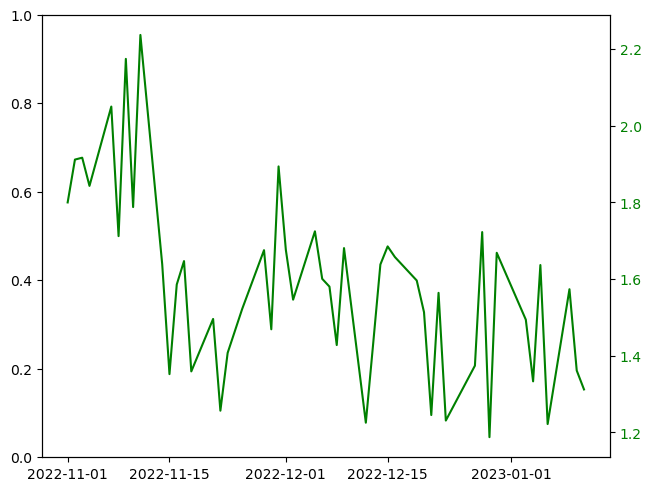

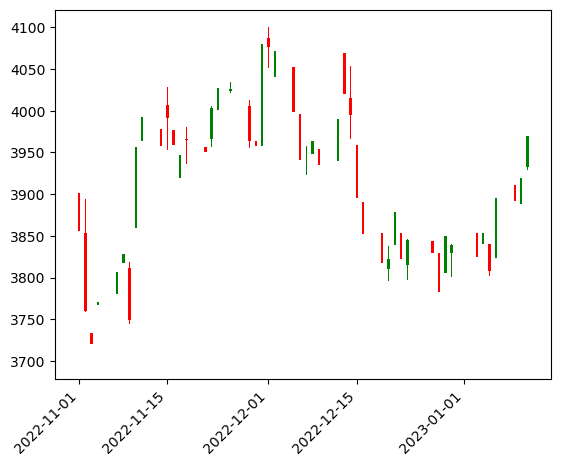

In [83]:

fig, ax = plt.subplots(constrained_layout=True)
plt.figure()
width=.4
width2=.05

up=full_data[full_data.Close>=full_data.Open]
down=full_data[full_data.Close<full_data.Open]

col1="green"
col2="red"

plt.bar(up.index,up.Close -up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High -up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low -up.Open,width2,bottom=up.Open,color=col1)


plt.bar(down.index,down.Close -down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High -down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low -down.Close,width2,bottom=down.Close,color=col2)

plt.xticks(rotation=45,ha="right")




ax2 = ax.twinx()


ax2.plot(full_data["sentiment_title"], color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.show()

<AxesSubplot:xlabel='Close', ylabel='sentiment_title'>

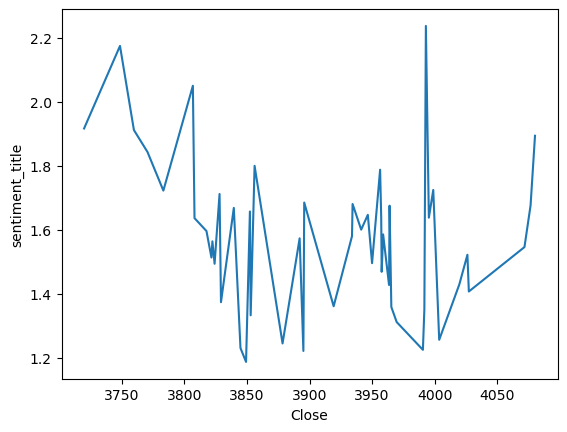

In [84]:
sns.lineplot(data=full_data, x="Close",y="sentiment_title")


                                                                            ML Linear Regression 
                                                                predict the price based on the sentiment score

Providing Data

In [85]:
ml_data=full_data.reset_index()

In [86]:
#ml_data.drop(labels="index",inplace=True,axis=1)

KeyError: "['index'] not found in axis"

In [87]:
X=full_data[["sentiment_title"]]
y=full_data[["Close"]]

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34, 1)
(15, 1)
(34, 1)
(15, 1)


Standartization

Fitting Model 

In [89]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Model Prediction

In [90]:
y_predict=lr.predict(X_test)

Model Evaluation

In [91]:
print("Inrecept is " + str(lr.intercept_))
print("R-squared value is ",lr.score(X_train,y_train))
print("Adjusted R-squared value is",r2_score(y_test, y_predict,multioutput='variance_weighted'))
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_predict)))
print("MAE:",mean_absolute_error(y_test, y_predict))


Inrecept is [4046.89826045]
R-squared value is  0.054985968912599326
Adjusted R-squared value is -0.018950710897964962
MSE: 9718.440203333616
RMSE: 98.58214951670315
MAE: 85.9331722259135


In [92]:
y_prediction=pd.DataFrame(y_predict,columns={"predicted_values":y_predict})

In [98]:
#y_test.reset_index(inplace=True,drop=True)
#y_test.drop(labels="index",axis=1,inplace=True)


In [100]:
y_test

,Close
0,3934.379883
1,3821.620117
2,3783.219971
3,3969.610107
4,3719.889893
5,3770.550049
6,3824.139893
7,4019.649902
8,3895.080078
9,3995.320068


In [99]:
lr_performance=pd.concat([y_test,y_prediction],axis=1)

In [95]:
lr_performance.rename(columns={"Close":"actual_values"},inplace=True)

In [96]:
lr_performance

,actual_values,predicted_values
0,3934.379883,3911.711792
1,3821.620117,3925.157138
2,3783.219971,3908.352645
3,3969.610107,3941.360533
4,3719.889893,3892.750661
5,3770.550049,3898.664252
6,3824.139893,3926.724998
7,4019.649902,3931.915880
8,3895.080078,3948.619440
9,3995.320068,3915.152874


<AxesSubplot:>

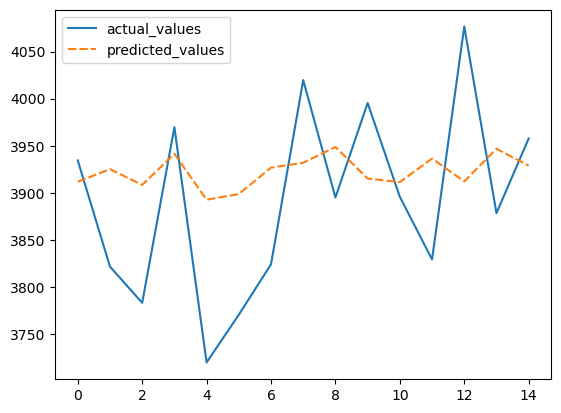

In [97]:
sns.lineplot(data=lr_performance)

                                                                                        Time series 

<AxesSubplot:xlabel='Date'>

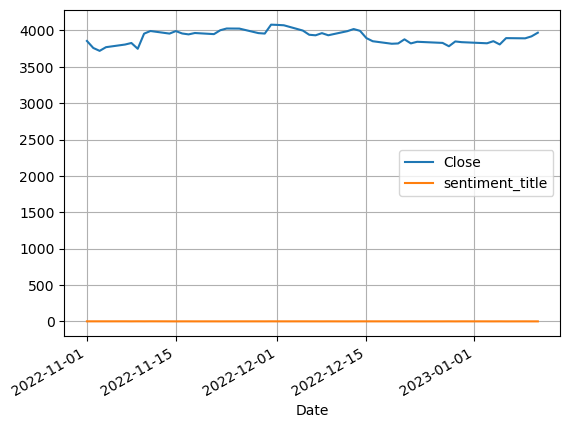

In [ ]:
full_data[["Close","sentiment_title"]].plot(grid="on")

In [ ]:
#Augmented Dickey Fuller Test (ADF Test) - non-stationary

# ADF Test
result = adfuller(full_data["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.158002571112376
n_lags: 0.22183948229034844
p-value: 0.22183948229034844
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777


In [ ]:
# ADF Test non-stationary
result = adfuller(index_price_13m["Close"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.652761382221548
n_lags: 0.08257533145900703
p-value: 0.08257533145900703
Critial Values:
   1%, -3.4548957220044336
Critial Values:
   5%, -2.8723451788613157
Critial Values:
   10%, -2.572527778361272


<AxesSubplot:xlabel='Date'>

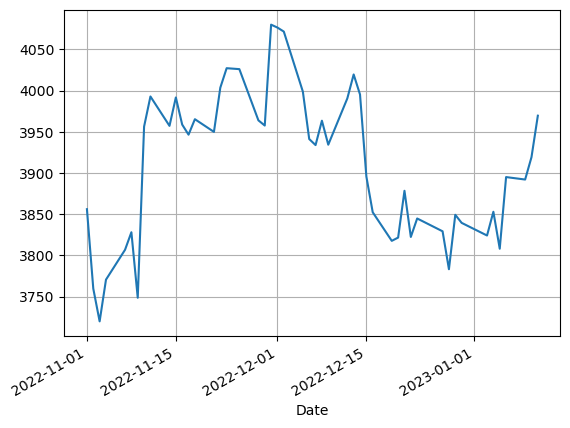

In [ ]:
full_data["Close"].plot(grid="on")

<AxesSubplot:xlabel='Date'>

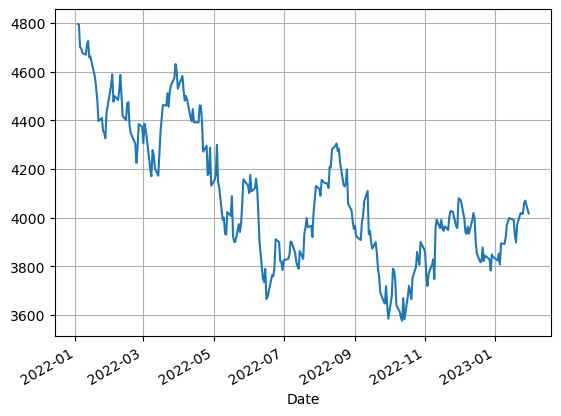

In [ ]:
index_price_13m["Close"].plot(grid="on")

                                                                                                 Full data set 

In [ ]:
df_news_prices=news.loc[:,["date","sentiment_title","sentiment_description"]].set_index("date").join(index_price)

In [ ]:
df_news_prices.dropna(axis=0,inplace=True)

In [ ]:
df_news_prices.tail(1)

,sentiment_title,sentiment_description,Open,High,Low,Close,Volume
2022-12-14,2,2.0,4015.540039,4053.76001,3965.649902,3995.320068,4.472340e+09


In [ ]:
df_news_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9940 entries, 2022-11-01 to 2022-12-14
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiment_title        9940 non-null   int64  
 1   sentiment_description  9940 non-null   float64
 2   Open                   9940 non-null   float64
 3   High                   9940 non-null   float64
 4   Low                    9940 non-null   float64
 5   Close                  9940 non-null   float64
 6   Volume                 9940 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 621.2 KB


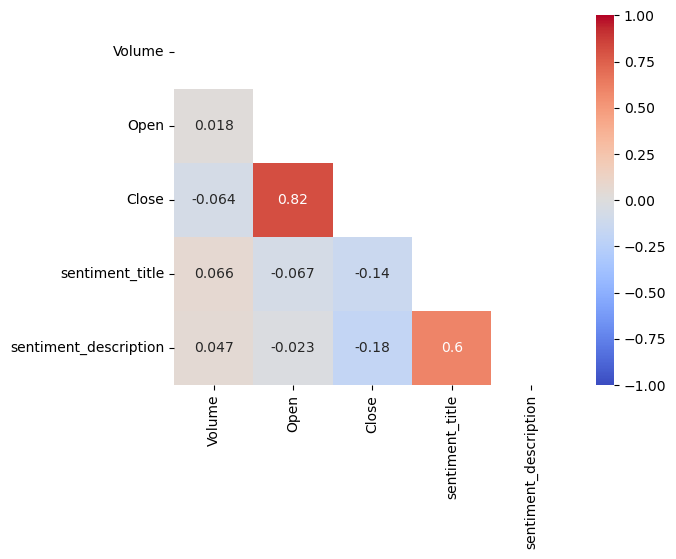

In [ ]:
#Correlation matrix

fig,axs=plt.subplots()

corr_data=df_news_prices[["Volume","Open","Close","sentiment_title","sentiment_description"]]
# hour_df=hour[["yr","season","holiday","mnth","weekday","orkingday","weathersit","temp","atemp","hum","windspeed","weather_score","casual","registered"]]
matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()

                                                                                            FB Prophet 

In [ ]:
# Training model 

df_close=full_data.drop(["sentiment_title","Open","High","Low","Volume"],axis=1)
df_score=full_data.drop(["Close","Open","High","Low","Volume"],axis=1)


In [ ]:
df_close.reset_index(inplace=True)
df_score.reset_index(inplace=True)


In [ ]:
df_close = df_close.rename(columns = {'Date':'ds',"Close":"y"})
df_score = df_score.rename(columns = {'Date':'ds',"sentiment_title":"y"})

In [ ]:
m=Prophet(interval_width=0.95)
model=m.fit(df_close)


13:37:07 - cmdstanpy - INFO - Chain [1] start processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


13:37:07 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
m2=Prophet(interval_width=0.95)
model2=m2.fit(df_score)

13:37:07 - cmdstanpy - INFO - Chain [1] start processing
13:37:07 - cmdstanpy - INFO - Chain [1] done processing


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
#Forecast "Close" price
future=m.make_future_dataframe(periods=0,freq="D")
forecest_close=m.predict(future)

In [ ]:
#Forecast "SEntiment title" 
future2=m2.make_future_dataframe(periods=0,freq="D")
forecest_score=m2.predict(future2)

In [ ]:
forecest_close.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3686.197207,3862.982455,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3688.870580,3884.143700,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3692.923658,3879.411877,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3722.469959,3910.281525,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3749.324254,3923.674368,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764


In [ ]:
index_price

In [ ]:
forecest_close.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,2092.582391,3686.197207,3862.982455,2092.582391,2092.582391,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3772.633024
1,2022-11-02,2105.506571,3688.870580,3884.143700,2105.506571,2105.506571,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3782.174747
2,2022-11-03,2118.430751,3692.923658,3879.411877,2118.430751,2118.430751,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3787.159064
3,2022-11-04,2131.354930,3722.469959,3910.281525,2131.354930,2131.354930,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3814.476270
4,2022-11-07,2170.127469,3749.324254,3923.674368,2170.127469,2170.127469,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3831.942764
5,2022-11-08,2183.051649,3775.873733,3954.949328,2183.051649,2183.051649,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,1680.050632,0.0,0.0,0.0,3863.102281
6,2022-11-09,2195.975829,3785.609472,3966.490701,2195.975829,2195.975829,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,1676.668176,0.0,0.0,0.0,3872.644005
7,2022-11-10,2208.900009,3784.737171,3967.611528,2208.900009,2208.900009,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,1668.728313,0.0,0.0,0.0,3877.628322
8,2022-11-11,2221.824189,3809.473230,4000.066828,2221.824189,2221.824189,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,1683.121339,0.0,0.0,0.0,3904.945528
9,2022-11-14,2260.576199,3826.670551,4015.482779,2260.576199,2260.576199,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,1661.815295,0.0,0.0,0.0,3922.391493


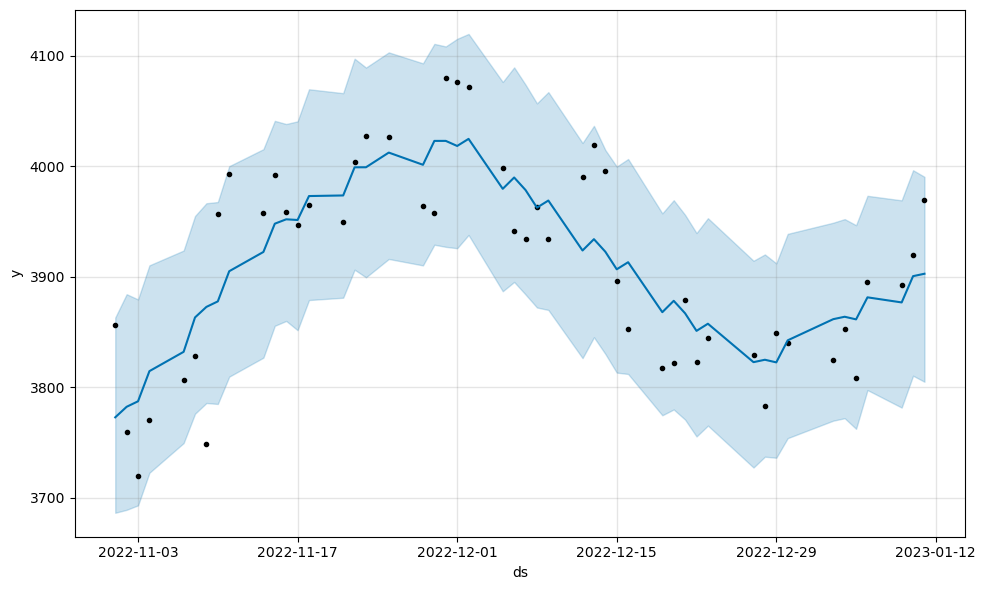

In [ ]:
plot1=m.plot(forecest_close)

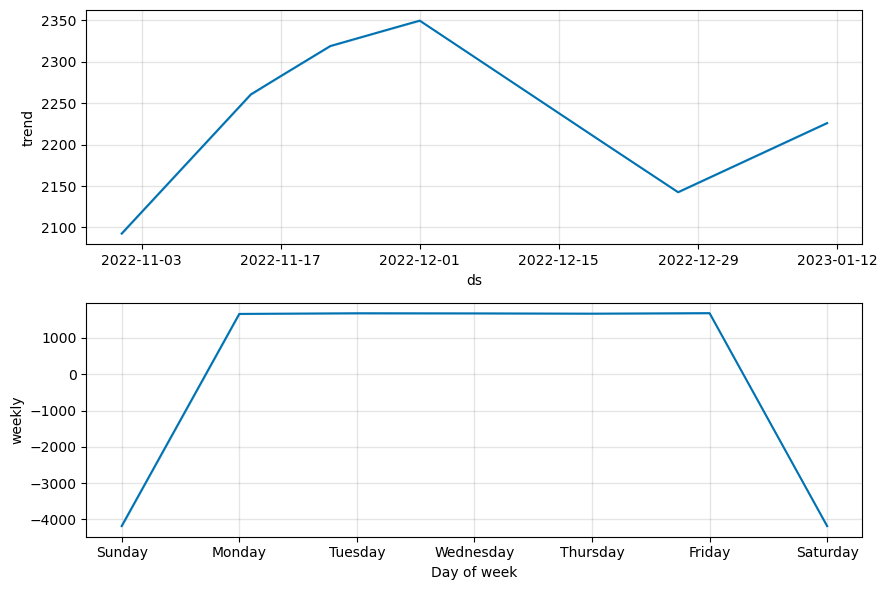

In [ ]:
plot2=m.plot_components(forecest_close)

In [ ]:
forecest_score.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1.009516,1.336045,2.077732,1.009516,1.009516,0.702610,0.702610,0.702610,0.702610,0.702610,0.702610,0.0,0.0,0.0,1.712126
1,2022-11-02,1.003100,1.497248,2.191797,1.003100,1.003100,0.839965,0.839965,0.839965,0.839965,0.839965,0.839965,0.0,0.0,0.0,1.843065
2,2022-11-03,0.996684,1.455740,2.187099,0.996684,0.996684,0.827146,0.827146,0.827146,0.827146,0.827146,0.827146,0.0,0.0,0.0,1.823830
3,2022-11-04,0.990268,1.436081,2.179722,0.990268,0.990268,0.808481,0.808481,0.808481,0.808481,0.808481,0.808481,0.0,0.0,0.0,1.798749
4,2022-11-07,0.971021,1.428548,2.141616,0.971021,0.971021,0.819861,0.819861,0.819861,0.819861,0.819861,0.819861,0.0,0.0,0.0,1.790881
5,2022-11-08,0.964605,1.306829,2.044852,0.964605,0.964605,0.702610,0.702610,0.702610,0.702610,0.702610,0.702610,0.0,0.0,0.0,1.667215
6,2022-11-09,0.958189,1.409626,2.157976,0.958189,0.958189,0.839965,0.839965,0.839965,0.839965,0.839965,0.839965,0.0,0.0,0.0,1.798154
7,2022-11-10,0.951773,1.405360,2.141088,0.951773,0.951773,0.827146,0.827146,0.827146,0.827146,0.827146,0.827146,0.0,0.0,0.0,1.778919
8,2022-11-11,0.945357,1.367238,2.111197,0.945357,0.945357,0.808481,0.808481,0.808481,0.808481,0.808481,0.808481,0.0,0.0,0.0,1.753838
9,2022-11-14,0.926109,1.367835,2.125275,0.926109,0.926109,0.819861,0.819861,0.819861,0.819861,0.819861,0.819861,0.0,0.0,0.0,1.745970


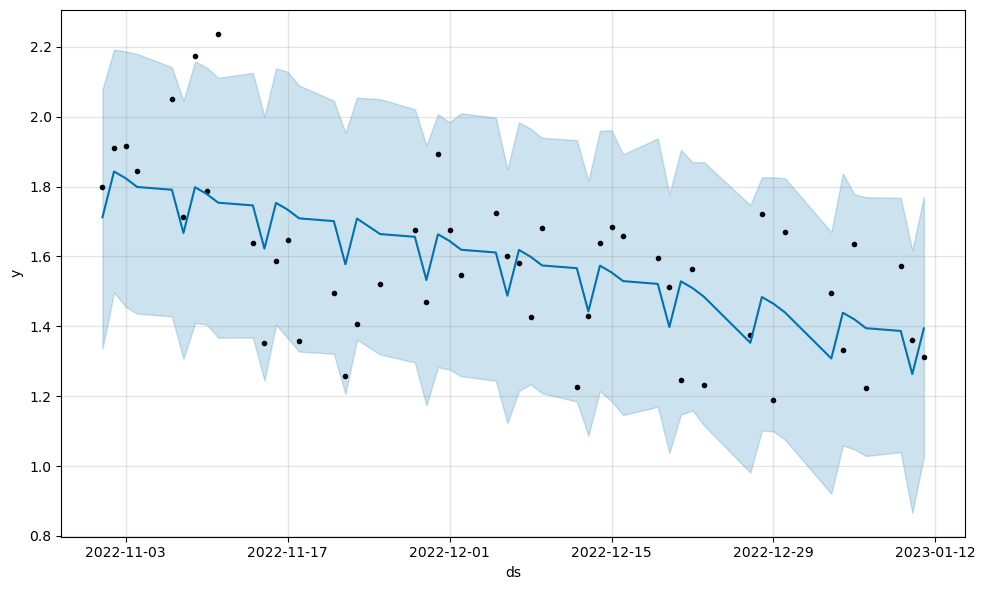

In [ ]:
plot_score1=m2.plot(forecest_score)

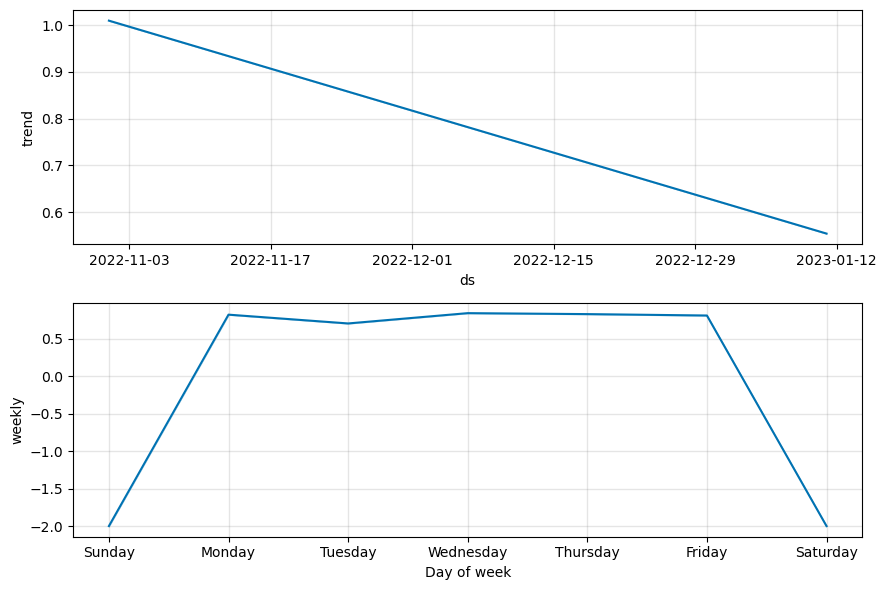

In [ ]:
plot_score2=m2.plot_components(forecest_score)

In [ ]:
forecast=forecest_close.join(forecest_score,rsuffix="_a")

In [ ]:
forecast=forecast.loc[:,["ds","yhat","yhat_a"]]

In [ ]:
forecast.info()
#df2['yhat'] = df2['trend'] + df2['seasonal']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      49 non-null     datetime64[ns]
 1   yhat    49 non-null     float64       
 2   yhat_a  49 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [ ]:
forecast.rename(columns={"yhat":"close","yhat_a":"sentiment_score"},inplace=True)

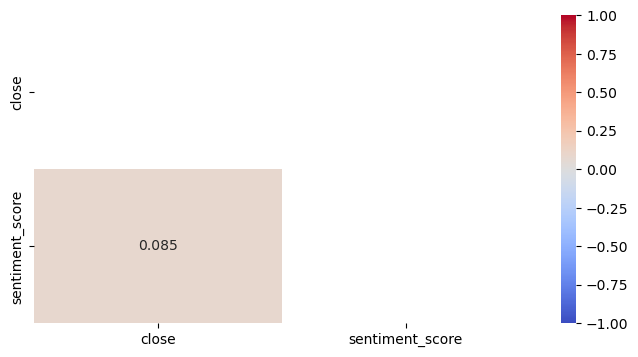

In [ ]:
#Correlation matrix

fig,axs=plt.subplots(figsize=(8,4))

corr_data=forecast[["close","sentiment_score"]]

matrix_df=corr_data.corr()

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(matrix_df, dtype=bool))

sns.heatmap(data=matrix_df,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=False,annot=True,mask=mask)
plt.show()